**Due date is Wednesday, April 7, 2021, 23:59 PST**

**ONLY write into the existing cells, and do NOT delete or add any cells.**


# ELEC 400M / EECE 571M Assignment 3: Clustering
(Again, this assignment drew inspiration from an assignment used in ECE 421 at the University of Toronto and kindly made available to us by the instructor; as well as from the problem set in our textbook Learning from Data.)

In this assignment, you will implement and test methods for clustering that we have discussed in the course.

## Data Sets

You will be working with two data sets:
- data2D.npy
- data100D.npy

Each of the data sets has 10,000 data points, which are 2-dimensional and 100-dimensional, respectively.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## K-Means algorithm [18 marks]

You will first implement and test the K-means algorithm. 

For this, you will **only use functions from the NumPy library**. 

### Implement the functions [5 marks]

You will implement four functions to realize the K-Means algorithm.

- `distanceFunc`: This function accepts your data and cluster centers and returns the squared pairwise distances between data points and cluster centers. 
- `KMinit`: This function accepts your data and returns the initial cluster centres. You will use the "greedy approach" described on page 6-16 in the textbook, but instead of a randomly selected data point always pick the first entry in the data set as the first center. 
- `lossFunc`: This function accepts the squared pairwise distances between data points and cluster centers and returns the error measure as defined in (6.5) in the textbook. 
- `KMmeans`: This function implements the K-Means algorithm as described in the textbook. It returns the cluster centers and the error measure as defined in (6.5) in the textbook. 

In [4]:
def distanceFunc(x, mu):
    # Inputs  
    # x: is an NxD data matrix (N observations and D dimensions)
    # mu: is an KxD cluster center matrix (K cluster centers and D dimensions)
    # Output
    # pair_dist2: is the NxK matrix of squared pairwise distances
    
    # YOUR CODE HERE
        # (x[i] - mu[j]) ** 2 = x[i] ** 2 + mu[j] ** 2 - 2 * x[i] * mu[j]
    return ((x ** 2) @ np.ones(shape=(x.shape[1], mu.shape[0]))) \
            + (np.ones(shape=(x.shape[0], x.shape[1])) @ (mu ** 2).T) \
            - 2 * (x @ mu.T)

In [5]:
def KMinit(x, K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Output
    # mu: is the KxD matrix of initial cluster centers using the "greedy approach" described on page 6-16 in the textbook. 
    # Remark: Always pick the first entry in the data set as the first center. 
    
    # YOUR CODE HERE
    distances = distanceFunc(x, x)
    n = x.shape[0]
    dis = [np.inf] * n
    mu = []
    for k in range(K):
        mx = 0
        for i in range(n):
            if dis[i] > dis[mx]:
                mx = i
        if k == 0:
            mx = 0
        mu.append(x[mx])
        for i in range(n):
            dis[i] = min(dis[i], distances[mx][i])
    return np.array(mu, dtype=np.float)

In [6]:
def lossFunc(pair_dist2):
    # Input 
    # pair_dist2: is an NxK matrix of squared pairwise distances
    # Output
    # loss: error as defined in (6.5) in the textbook
    
    # YOUR CODE HERE
    return np.sum(np.min(pair_dist2, axis=1))

In [7]:
def Kmeans(x,K):
    # Inputs
    # x: is an NxD data matrix 
    # K: number of clusters
    # Outputs
    # mu: is the KxD of cluster centers  
    # loss: error as defined in (6.5) in the textbook 
    
    # YOUR CODE HERE
    centroids = KMinit(x, K)
    prev_loss = np.inf
    while True:
        dis = distanceFunc(x, centroids)
        
        new_loss = lossFunc(dis)
        if new_loss >= prev_loss:
            break
        prev_loss = new_loss
        
        closest = np.argmin(dis, axis=1)
        for k in range(K):
            centroids[k, :] = np.mean(x[closest == k, :], axis=0)
        
    return centroids, new_loss
    

### Test the functions [5 marks]

Develop toy-sized test cases (create your own very small data set(s)) for all four functions and verify the correct operation. 

Use the code cell below to program the test cases and to print and/or plot the results as appropriate. 

Use the text cell below to describe your test cases, to show the results and plots from your code, and to comment on the results. 

Initial Centroids
[[ 1.  1.]
 [ 6.  6.]
 [ 7. -1.]]
Initial Distances to Centroids
[[ 0. 50. 40.]
 [ 1. 61. 53.]
 [ 1. 61. 37.]
 [25.  5. 45.]
 [34.  4. 58.]
 [50.  0. 50.]
 [40. 50.  0.]
 [25. 25.  5.]]
Initial Centroids Loss
16.0
Final Centroids
[[0.66666667 0.66666667]
 [4.66666667 5.66666667]
 [6.5        0.        ]]
Final Centroids Loss
7.166666666666691


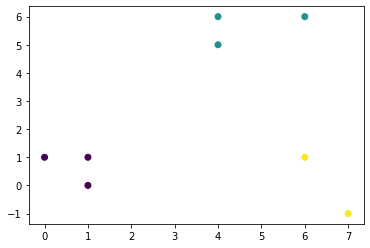

In [8]:
# YOUR CODE HERE
small_X = np.array([[1, 1], [0, 1], [1, 0], [4, 5], [4, 6], [6, 6], [7, -1], [6, 1]])

K = 3

inits = KMinit(small_X, K)
print('Initial Centroids')
print(inits)

print('Initial Distances to Centroids')
print(distanceFunc(small_X, inits))

print('Initial Centroids Loss')
print(lossFunc(distanceFunc(small_X, inits)))

final_centroids, final_loss = Kmeans(small_X, K)
print('Final Centroids')
print(final_centroids)

print('Final Centroids Loss')
print(final_loss)

colors = np.argmin(distanceFunc(small_X, final_centroids), axis=1)
plt.scatter(small_X[:, 0], small_X[:, 1], c=colors)

## Outputs
### Initial Centroids
[[ 1.  1.]\
 [ 6.  6.]\
 [ 7. -1.]]
### Initial Distances to Centroids
[[ 0. 50. 40.]\
 [ 1. 61. 53.]\
 [ 1. 61. 37.]\
 [25.  5. 45.]\
 [34.  4. 58.]\
 [50.  0. 50.]\
 [40. 50.  0.]\
 [25. 25.  5.]]
### Initial Centroids Loss
16.0
### Final Centroids
[[0.66666667 0.66666667]\
 [4.66666667 5.66666667]\
 [6.5        0.        ]]
### Final Centroids Loss
7.166666666666691

Uploaded all plots including this one to the assignment folder as images. It should be displayed properly, but if not, please reach out to me, thanks!
<img src="testFuncs.png" width="400">

### Run K-Means on 2D data set [4 marks]

Implement a script that runs the K-Means algorithm using the functions above and run it for the data set data2D.npy with $K = 1, 2, 3, 4, 5$.  

The script should produce the following plots:
- for each of these values of $K$, a 2D scatter plot of the data points colored by their cluster assignments plus the cluster centers
- the K-means loss as a function of $K$

Show the plots in the text cell below and discuss how many clusters you think are "best" and why.

K = 1, loss is = 38453.49
K = 2, loss is = 9203.35
K = 3, loss is = 5110.95
K = 4, loss is = 3374.04
K = 5, loss is = 2848.36


Text(0.5, 1.0, 'Loss as a function of K')

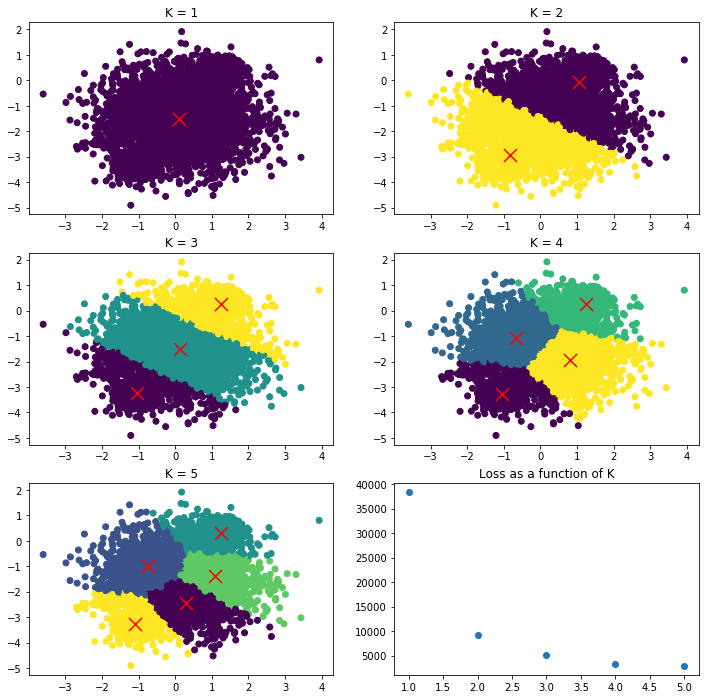

In [9]:
# YOUR CODE HERE
X = np.load('data2D.npy')

plt.figure(figsize=(12, 12))

losses = []

for k in range(1, 6):
    centroids, loss = Kmeans(X, k)
    colors = np.argmin(distanceFunc(X, centroids), axis=1)
    plt.subplot(320 + k)
    plt.scatter(X[:, 0], X[:, 1], c=colors)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=169, linewidths=3, color="red", zorder=10)
    plt.title("K = {}".format(k))
    print('K = {}, loss is = {}'.format(k, round(loss, 2)))
    losses.append(loss)
    
plt.subplot(326)
plt.scatter(range(1, 6), losses)
plt.title('Loss as a function of K')

## Outputs
K = 1, loss is = 38453.49\
K = 2, loss is = 9203.35\
K = 3, loss is = 5110.95\
K = 4, loss is = 3374.04\
K = 5, loss is = 2848.36\
<img src="2DPlot.png">

### How Many Clusters?
To determine how many clusters are best, we can first look into the loss/error amount in each data set. But while K = 5 seems to have the least amount of error, it may not be the optimal pick for efficiency, and can be overfitting. Looking at the plot for the K-means loss as a function of 𝐾, we can see that the biggest drop in loss occurs in K = 2. As we've seen in class using the elbow curve method (heel of the hockey stick), we see that the change of slope from steep to shallow is appearing at K = 2, therefore we can say that it represents an accurate clustering without overfitting.

### Explore Gap statistic [4 marks]

Implement a script which does the following using the functions implemented above.

Generate benchmark random data of the same size as the 2D data set, distributed uniformly over the smallest axis-aligned rectangle containing the actual data. Run the K-Means algorithm on this random data for $K=1,2,3,4,5$. 

Repeat for 10 such random data sets to obtain the average of the log-K-Means errors, $$\mathrm{LE}_{\mathrm{in}}^{\mathrm{rand}}(K)=\frac{1}{10}\sum\limits_{i=1}^{10}\log\left(E_{\mathrm{in},i}^{\mathrm{rand}}(K)\right)$$ as a function of $K$. 

Plot the average K-Means error and the gap statistic 
$$G(K)=\mathrm{LE}_{\mathrm{in}}^{\mathrm{rand}}(K)-\log \left[E_{\mathrm{in}}(K)\right]$$
as functions of $K$, where $E_{\mathrm{in}}(K)$ is the K-Means error for the data set data2D.npy obtained above.

Also plot the difference $G(K)-G(K+1)-s(K+1)$ as a function of $K$, 
where
$$s(K)=\sqrt{1+1/10} \left[\frac{1}{10} \sum_{i=1}^{10} \left(\log \left(E_{\mathrm{in},i}^{\mathrm{rand}}(K)\right) - \mathrm{LE}^{\mathrm{rand}}_{\mathrm{in}}(K)\right)^2\right]^{1/2}$$ 
is the scaled empirical standard deviation of the log-in-sample error.

In the text cell below, show your plots and briefly explain the use of the gap statistic to determine the best number of clusters. Compare the result with your result from above. (Consult https://statweb.stanford.edu/~gwalther/gap for the necessary background.)

k=1, out=-0.89
k=2, out=-0.17
k=3, out=0.04
k=4, out=0.01
k=5, out=0.04


Text(0.5, 1.0, 'G(K)-G(K+1)+s(K+1) plot')

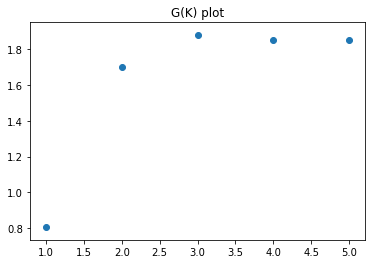

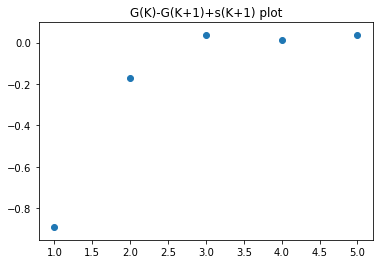

In [10]:
# Retain this initialization of the random generato
np.random.seed(421)

# YOUR CODE HERE
X = np.load('data2D.npy')

rect_mins = np.min(X, axis=0)
rect_maxs = np.max(X, axis=0)

rand_X = []
for rand_i in range(1, 11):
        rand_X.append(np.random.uniform(low=rect_mins, high=rect_maxs, size=X.shape))
        
def LE(k):
    log_errs = []
    for i in range(10):
        log_errs.append(np.log(Kmeans(rand_X[i], k)[1]))
    return np.mean(log_errs)

def G(k):
    return LE(k) - np.log(Kmeans(X, k)[1])

def S(k):
    terms = []
    lek = LE(k)
    for i in range(10):
        terms.append((np.log(Kmeans(rand_X[i], k)[1]) - lek) ** 2)
    return np.sqrt(1 + 1/10) * np.sqrt(np.mean(terms))

x = []
y = []
for k in range(1, 6):
    y.append(G(k))
    x.append(k)
plt.scatter(x, y)
plt.title('G(K) plot')

plt.figure()



x = []
y = []
for k in range(1, 6):
    y.append(G(k) - G(k+1) + S(k+1))
    print('k={}, out={}'.format(k, round(y[-1], 2)))
    x.append(k)

plt.scatter(x, y)
plt.title('G(K)-G(K+1)+s(K+1) plot')

## Outputs
k=1, out=-0.89\
k=2, out=-0.17\
k=3, out=0.04\
k=4, out=0.01\
k=5, out=0.04
## Plots
<img src="gapStat.png">

The gap statistics method can be applied to any clustering algorithm to find the optimal cluster number in a dataset. In this method, the estimate of the optimal clusters will be the value that maximizes the gap statistic: The smallest k such that $G(k) >= G(k+1)-s(k+1)$. In our case, we can see that k = 3 is the first k with positive $G(K)-G(K+1)+s(K+1)$, and the largest gap statistics value, therefore it is the suitable k based on gap analysis.

## Soft-clustering with the Mixture of Gaussians [7 marks]

Now you will implement and test soft-clustering using density estimation with Gaussian mixture models. For this you will use the functions from the **scikit-learn library**.

First, write a script that, for the 2D data set data2D.npy,
- estimates the parameters of the Gaussian mixture models with $K=3$ components,
- plots the contours of the density,
- plots the decision boundaries for clustering (in the same plot). 

In the text cell below, show the plot, interpret what you see in the plot and compare with the plot for $K=3$ clusters for the K-Means algorithm above. 

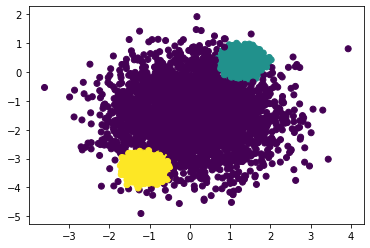

In [11]:
# YOUR CODE HERE
from sklearn.mixture import GaussianMixture

X = np.load('data2D.npy')
gm = GaussianMixture(n_components=3).fit(X)

colors = gm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis')

## Plot
<img src="gaussian.png">

Using the Gaussian Mixture Models approach, we can see three clusters forming, similar to the K-means approach. However, we can clearly see the difference between cluster shapes in each method. K-means algorithm uses "Hard assignment", which assigns the centroid and optimizes the centroid based on the distances from the points to it. It assumes the clusters are spherical, so does not work very efficiently with non-linear data. On the GMM approach, instead of hard assigning data points to a cluster, we use the probability of a sample to determine the feasibility of it belonging to a cluster. GMM does not assume clusters to be of any geometry, therefore works well with non-linear geometric distributions as well. We can observe these differences with the less rigid and rounder cut shapes in the GMM plot, compared to the K-Means plot.

Write a script that trains the Gaussian mixture model for the data set data2D.npy for $K=1,2,3,4,5$, and computes and plots the Bayesian Information Criterion (BIC) as a function of $K$.

In the text cell below, show the plot, explain the BIC and what model size it suggests, and compare it with your result for the K-Means algorithm above. 

Text(0.5, 0, 'Components')

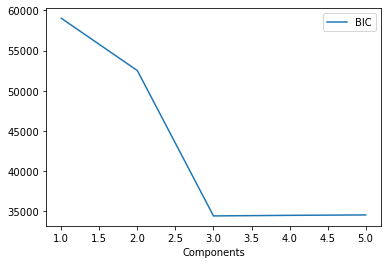

In [15]:
# YOUR CODE HERE
models = [GaussianMixture(n).fit(X) for n in np.arange(1, 6)]
plt.plot(np.arange(1, 6), [model.bic(X) for model in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('Components')

## Plot
<img src="BIC.png">

BIC(Bayesian Information Criterion) is used to choose the most appropriate model among a finite set of models. It is based on the likelihood function, where the model with the lowest BIC is preferred. It is described by the equation $BIC = k*ln(n) - 2ln( \hat L$)\
For our case, we can see that the lowest BIC occurs at K = 3, therefore it is the suitable cluster number based on the plot analysis.\
One big difference between the two models was that for K-Means, the loss kept on decreasing after K = 3, with the least amount of loss occuring at K = 5. Therefore the most accurate model was with cluster number 5. However for GMM, the lowest BIC happened at K = 3 with a very slight increase at K = 4 and K = 5. This suggests that the most accurate clustering was at K = 3. 

Implement a script that runs both the K-Means and the Gaussian mixture learning algorithms on data100D.npy for $K = \{3,4,5,6\}$ and plots the K-Means loss and the BIC as a function of $K$, respectively. 

Include the plots in the text cell below, and discuss how many clusters you think are within the dataset and compare the learnt results of K-means and Mixture of Gaussian approach.

Remark: The Gaussian mixture learning may take some time to complete (5-10 mins).


Text(0.5, 0, 'Components')

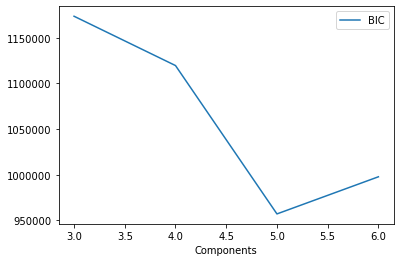

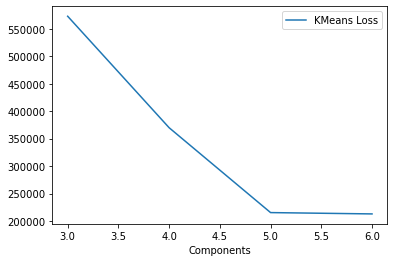

In [24]:
# YOUR CODE HERE
X = np.load('data100D.npy')

models = [GaussianMixture(n).fit(X) for n in np.arange(3, 7)]
plt.plot(np.arange(3, 7), [model.bic(X) for model in models], label='BIC')
plt.legend(loc='best')
plt.xlabel('Components')

plt.figure()

plt.plot(np.arange(3, 7), [Kmeans(X, k)[1] for k in np.arange(3, 7)], label='KMeans Loss')
plt.legend(loc='best')
plt.xlabel('Components')

## Plots
<img src="K-BIC.png">

For the same dataset used, both methods came up with the same answer to the optimal number of clusters.\
GMM approach that plotted BIC as a function of K clearly showed that the optimal number of clusters is 5, as the lowest BIC happened at K = 5 and there is a very steep rise right after K = 5.\
Looking at the K-Means plot, we can see that the biggest drop in loss occurs in K = 5 as well. As we've seen in class using the elbow curve method (heel of the hockey stick), we see that the change of slope from steep to shallow is appearing at K = 5, and there is not a slight drop in loss after that point. Therefore we can say that it provides an accurate clustering without overfitting.